<a href="https://colab.research.google.com/github/GeorgePapazafeiropoulos/GeorgePapazafeiropoulos.github.io/blob/D_Trials_1.0/Copy_of_Project1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from keras.regularizers import l1, l2
from keras.layers import Dense

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [27]:
# Importing Train Data
url = 'https://raw.githubusercontent.com/GeorgePapazafeiropoulos/GeorgePapazafeiropoulos.github.io/D_Trials_1.0/annOnline/DATA_TRAIN.csv'
traindata = pd.read_csv(url, skiprows=None)
traindata = traindata.values
#print(traindata)

# Importing Test Data
url='https://raw.githubusercontent.com/GeorgePapazafeiropoulos/GeorgePapazafeiropoulos.github.io/D_Trials_1.0/annOnline/DATA_TEST.csv'
testdata = pd.read_csv(url, skiprows=None)
testdata=testdata.values
#print(testdata)

# Importing Train Output
url='https://raw.githubusercontent.com/GeorgePapazafeiropoulos/GeorgePapazafeiropoulos.github.io/D_Trials_1.0/annOnline/OUTPUT_TRAIN.csv'
trainoutput = pd.read_csv(url, skiprows=None)
trainoutput=trainoutput.values
trainoutput=trainoutput/np.max(trainoutput)
print(trainoutput)

# Importing Test Output
url='https://raw.githubusercontent.com/GeorgePapazafeiropoulos/GeorgePapazafeiropoulos.github.io/D_Trials_1.0/annOnline/OUTPUT_TEST.csv'
testoutput = pd.read_csv(url, skiprows=None)
testoutput=testoutput.values
testoutput=testoutput/np.max(testoutput)
print(testoutput)

[[0.80729167]
 [0.7734375 ]
 [0.78385417]
 [0.64583333]
 [0.59895833]
 [0.53385417]
 [0.46614583]
 [0.359375  ]
 [0.35416667]
 [0.45052083]
 [0.44010417]
 [0.5078125 ]
 [0.20833333]
 [0.5       ]
 [0.48177083]
 [0.50520833]
 [0.49739583]
 [0.47395833]
 [0.41666667]
 [0.51822917]
 [0.4765625 ]
 [0.4296875 ]
 [0.5234375 ]
 [0.48177083]
 [0.37239583]
 [0.390625  ]
 [0.390625  ]
 [0.33333333]
 [0.453125  ]
 [0.4140625 ]
 [0.40885417]
 [0.39322917]
 [0.38802083]
 [0.58072917]
 [0.62239583]
 [0.53645833]
 [0.453125  ]
 [0.41145833]
 [0.44791667]
 [0.4140625 ]
 [0.4765625 ]
 [0.77864583]
 [0.90885417]
 [0.48177083]
 [0.47916667]
 [0.53645833]
 [0.49479167]
 [0.59895833]
 [0.55729167]
 [0.46354167]
 [0.51302083]
 [0.50520833]
 [0.52864583]
 [0.46354167]
 [0.33854167]
 [0.46875   ]
 [0.40364583]
 [0.43229167]
 [0.4375    ]
 [0.41666667]
 [0.34895833]
 [0.3984375 ]
 [0.390625  ]
 [0.36979167]
 [0.36458333]
 [0.5703125 ]
 [0.51302083]
 [0.4921875 ]
 [0.38541667]
 [0.54166667]
 [0.44270833]
 [0.53

In [28]:
#Shape of training data
traindata.shape

(119, 6)

In [29]:
#Shape of test data
testdata.shape

(56, 6)

In [30]:
#Shape of training output
trainoutput.shape

(119, 1)

In [31]:
#Shape of test output
testoutput.shape

(56, 1)

In [32]:
#Data Preprocessing
traindata = traindata /1.0
testdata = testdata /1.0

#print(traindata)
#print(testdata)

In [33]:
#Building the model
model = keras.Sequential([
    keras.layers.Flatten(),  # input layer (1)
    keras.layers.Dense(1024, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(1024, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(1024, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(1, activation='linear') # output layer (3)
])


In [34]:
# Flatten the input data and get the output shape of the flatten() layer
flatten_layer = model.layers[0]
output_shape = flatten_layer(traindata).shape
num_neurons = np.prod(output_shape)
print("Number of neurons in the input layer:", num_neurons)


Number of neurons in the input layer: 714


In [35]:
#Compiling the model
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])

In [36]:
#Training the model
model.fit(traindata, trainoutput, epochs=100, validation_split=0.2)  # we pass the data, labels and epochs

Epoch 1/100
3/3 [==============================] - 1s 113ms/step - loss: 4448.7139 - mean_absolute_error: 39.4784 - val_loss: 4706.2246 - val_mean_absolute_error: 67.6305
Epoch 2/100
3/3 [==============================] - 0s 45ms/step - loss: 1608.5936 - mean_absolute_error: 37.0012 - val_loss: 2.2137 - val_mean_absolute_error: 1.2979
Epoch 3/100
3/3 [==============================] - 0s 51ms/step - loss: 231.6785 - mean_absolute_error: 12.1239 - val_loss: 465.6383 - val_mean_absolute_error: 21.1032
Epoch 4/100
3/3 [==============================] - 0s 45ms/step - loss: 124.3950 - mean_absolute_error: 8.6284 - val_loss: 96.2905 - val_mean_absolute_error: 9.6101
Epoch 5/100
3/3 [==============================] - 0s 52ms/step - loss: 90.2235 - mean_absolute_error: 9.0570 - val_loss: 95.3687 - val_mean_absolute_error: 9.5363
Epoch 6/100
3/3 [==============================] - 0s 45ms/step - loss: 21.1292 - mean_absolute_error: 3.5252 - val_loss: 18.6890 - val_mean_absolute_error: 4.2552
Ep

In [37]:
test_loss, test_acc = model.evaluate(testdata,  testoutput, verbose=1)

print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

2/2 [==============================] - 0s 10ms/step - loss: 0.0264 - mean_absolute_error: 0.1157
Test loss: 0.026426883414387703
Test accuracy: 0.11568871885538101


In [38]:
predictions = model.predict(testdata)
#print(testdata)
#print(testdata.iloc[-1]) #In case that testdata is not numpy.ndarray object but dataframe object (which is the direct output of the pd.read_csv above)

2/2 [==============================] - 0s 9ms/step


In [39]:
#print(predictions)


In [40]:
#print(testoutput)

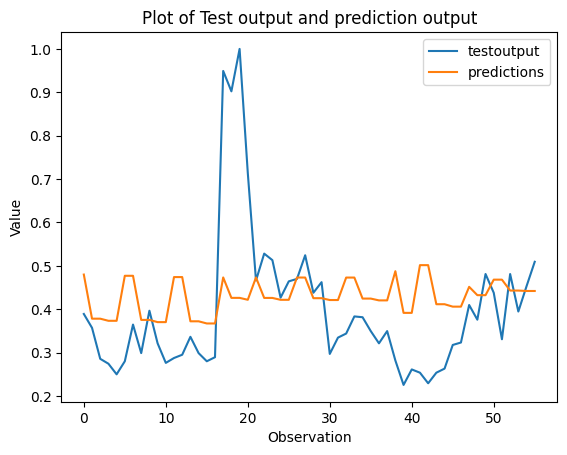

In [41]:
# Plot both vectors on the same plot
plt.plot(testoutput, label='testoutput')
plt.plot(predictions, label='predictions')

# Customize the plot (optional)
plt.xlabel('Observation')
plt.ylabel('Value')
plt.title('Plot of Test output and prediction output')
plt.legend()

# Show the plot
plt.show()